In [1]:
import numpy as np
import keras
from sklearn.model_selection import train_test_split
import tensorflow.keras
import matplotlib.pyplot as plt
import json
DATA_PATH = "data.json"

In [2]:
with open("data.json", "r") as file:
    data = json.load(file)
X = np.array(data["mfcc"])
y = np.array(data["labels"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
# inp = (X_train.shape[1], X_train.shape[2]) 
model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer=opt,loss='sparse_categorical_crossentropy')
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=30, epochs=20)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


C:\Users\yashw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 87, 64)              │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,802 (225.79 KB)

 Trainable params: 57,802 (225.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.3278 - loss: 1.8836 - val_accuracy: 0.4823 - val_loss: 1.4080
Epoch 2/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.5085 - loss: 1.3666 - val_accuracy: 0.5349 - val_loss: 1.2760
Epoch 3/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.5545 - loss: 1.2608 - val_accuracy: 0.5702 - val_loss: 1.1996
Epoch 4/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.6061 - loss: 1.1440 - val_accuracy: 0.5808 - val_loss: 1.1398
Epoch 5/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.6218 - loss: 1.0597 - val_accuracy: 0.6184 - val_loss: 1.0518
Epoch 6/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.6618 - loss: 0.9574 - val_accuracy: 0.6542 - val_loss: 0.9798
Epoch 7/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.6765 - loss: 0.9192 - val_accuracy: 0.6409 - val_loss: 0.9869
Epoch 8/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7055 - loss: 0.8593 - 

In [3]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
# _, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Training accuracy: ",train_acc)
print("Testing accuarcy: ",test_acc)
# print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

Training accuracy:  0.8875883221626282
Testing accuarcy:  0.7753443717956543


In [4]:
print(X_test.shape)
predictions = model.predict(X_test)

(2831, 87, 13)
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


In [5]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(9056, 87, 13) (2831, 87, 13) (9056,) (2831,)


In [6]:
test_pred = np.argmax(predictions, axis=1)

In [7]:
import sklearn
cm = sklearn.metrics.confusion_matrix(y_test, test_pred)

In [8]:
cm

array([[244,   0,   5,   0,   6,   0,   5,  12,  11,   1],
       [  0, 259,  14,   9,   0,   0,  16,   7,   3,   0],
       [  6,   3, 253,   4,   2,   3,  20,  10,   5,   0],
       [  1,   8,   6, 275,   6,   0,  11,   3,  14,   9],
       [  6,   0,  18,   6, 209,   4,   8,  23,   9,   0],
       [  1,   0,   2,   1,   0, 275,   4,   0,   2,   8],
       [  9,  18,  31,  15,   6,   2, 186,   6,  29,   8],
       [  7,   8,  21,   9,  13,   2,   7, 234,   4,   0],
       [  4,   6,  19,  12,   9,   2,  31,   3, 183,  13],
       [  1,   0,   1,   4,   5,   9,  13,   0,  17,  77]], dtype=int64)

In [9]:
import pandas as pd
confusion_df = pd.DataFrame(cm)
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,244,0,5,0,6,0,5,12,11,1
1,0,259,14,9,0,0,16,7,3,0
2,6,3,253,4,2,3,20,10,5,0
3,1,8,6,275,6,0,11,3,14,9
4,6,0,18,6,209,4,8,23,9,0
5,1,0,2,1,0,275,4,0,2,8
6,9,18,31,15,6,2,186,6,29,8
7,7,8,21,9,13,2,7,234,4,0
8,4,6,19,12,9,2,31,3,183,13
9,1,0,1,4,5,9,13,0,17,77


In [10]:
labels_dict = {
    0: 'jazz',
    1: 'reggae',
    2: 'rock',
    3: 'blues',
    4: 'hiphop',
    5: 'country',
    6: 'metal',
    7: 'classical',
    8: 'disco',
    9: 'pop'
}

In [11]:
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

,jazz,reggae,rock,blues,hiphop,country,metal,classical,disco,pop
jazz,244,0,5,0,6,0,5,12,11,1
reggae,0,259,14,9,0,0,16,7,3,0
rock,6,3,253,4,2,3,20,10,5,0
blues,1,8,6,275,6,0,11,3,14,9
hiphop,6,0,18,6,209,4,8,23,9,0
country,1,0,2,1,0,275,4,0,2,8
metal,9,18,31,15,6,2,186,6,29,8
classical,7,8,21,9,13,2,7,234,4,0
disco,4,6,19,12,9,2,31,3,183,13
pop,1,0,1,4,5,9,13,0,17,77


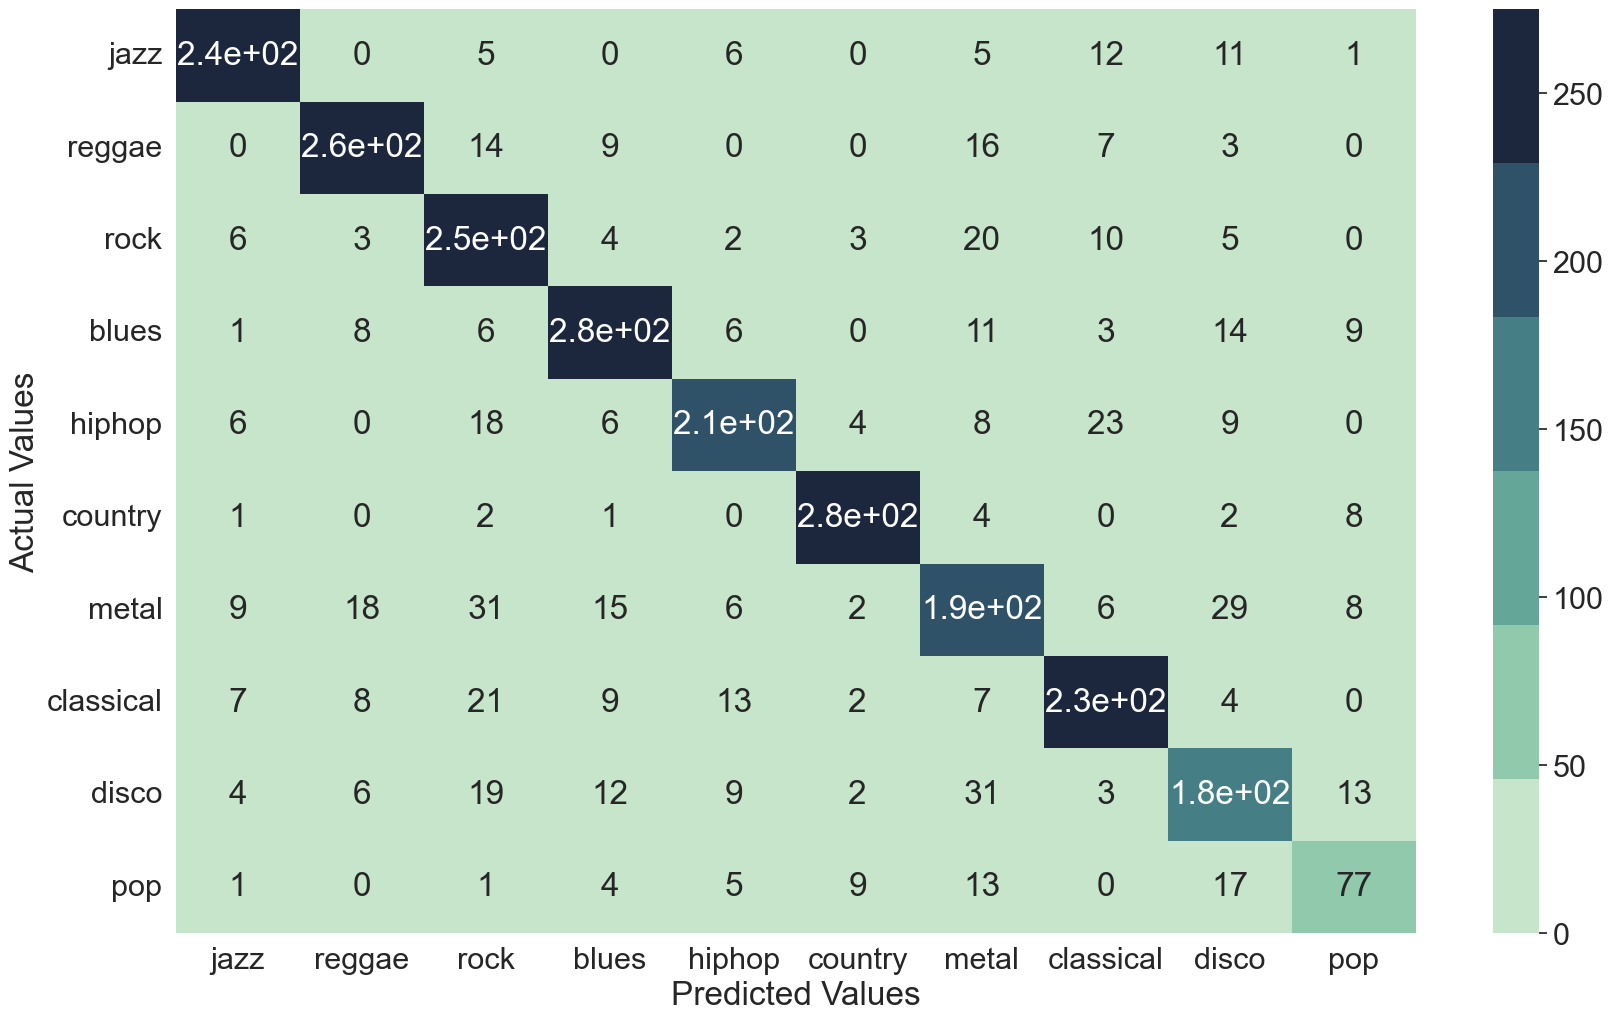

In [12]:
import seaborn as sns
plt.figure(figsize= (20,12))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(rot=-.4));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

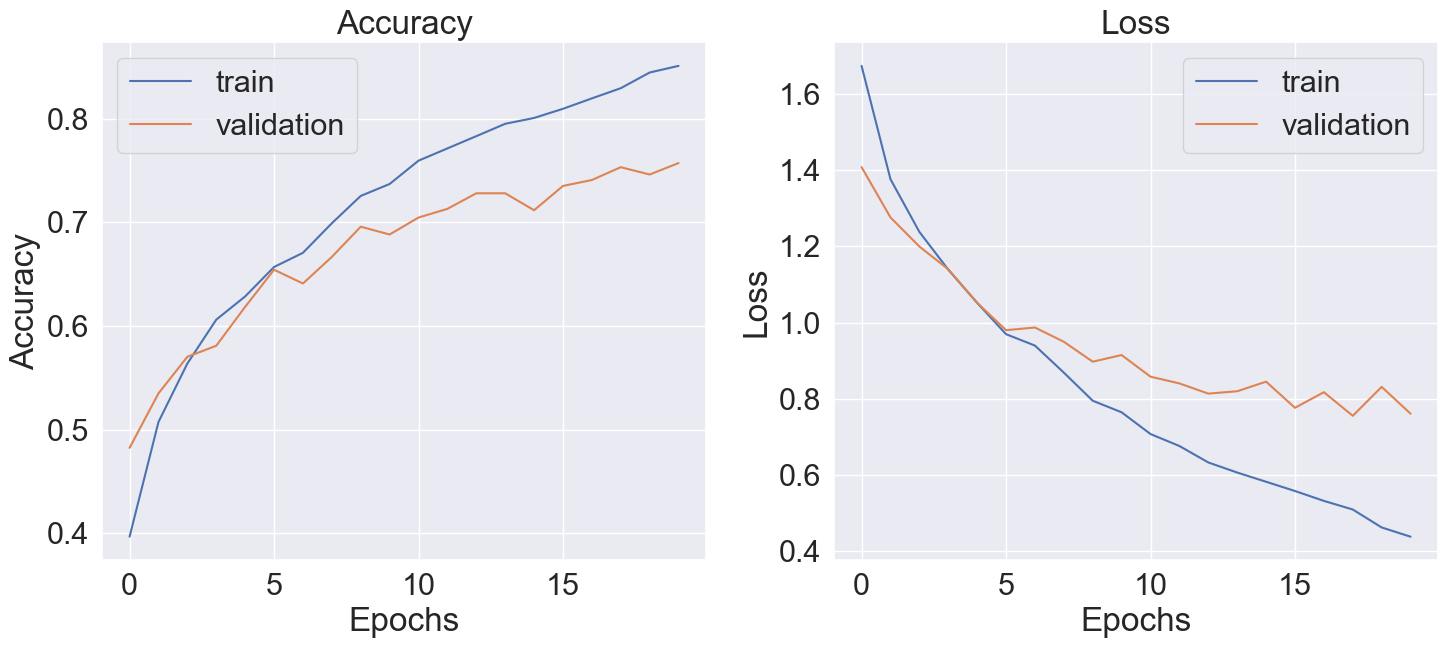

In [13]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:

#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()÷
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

Normalized confusion matrix


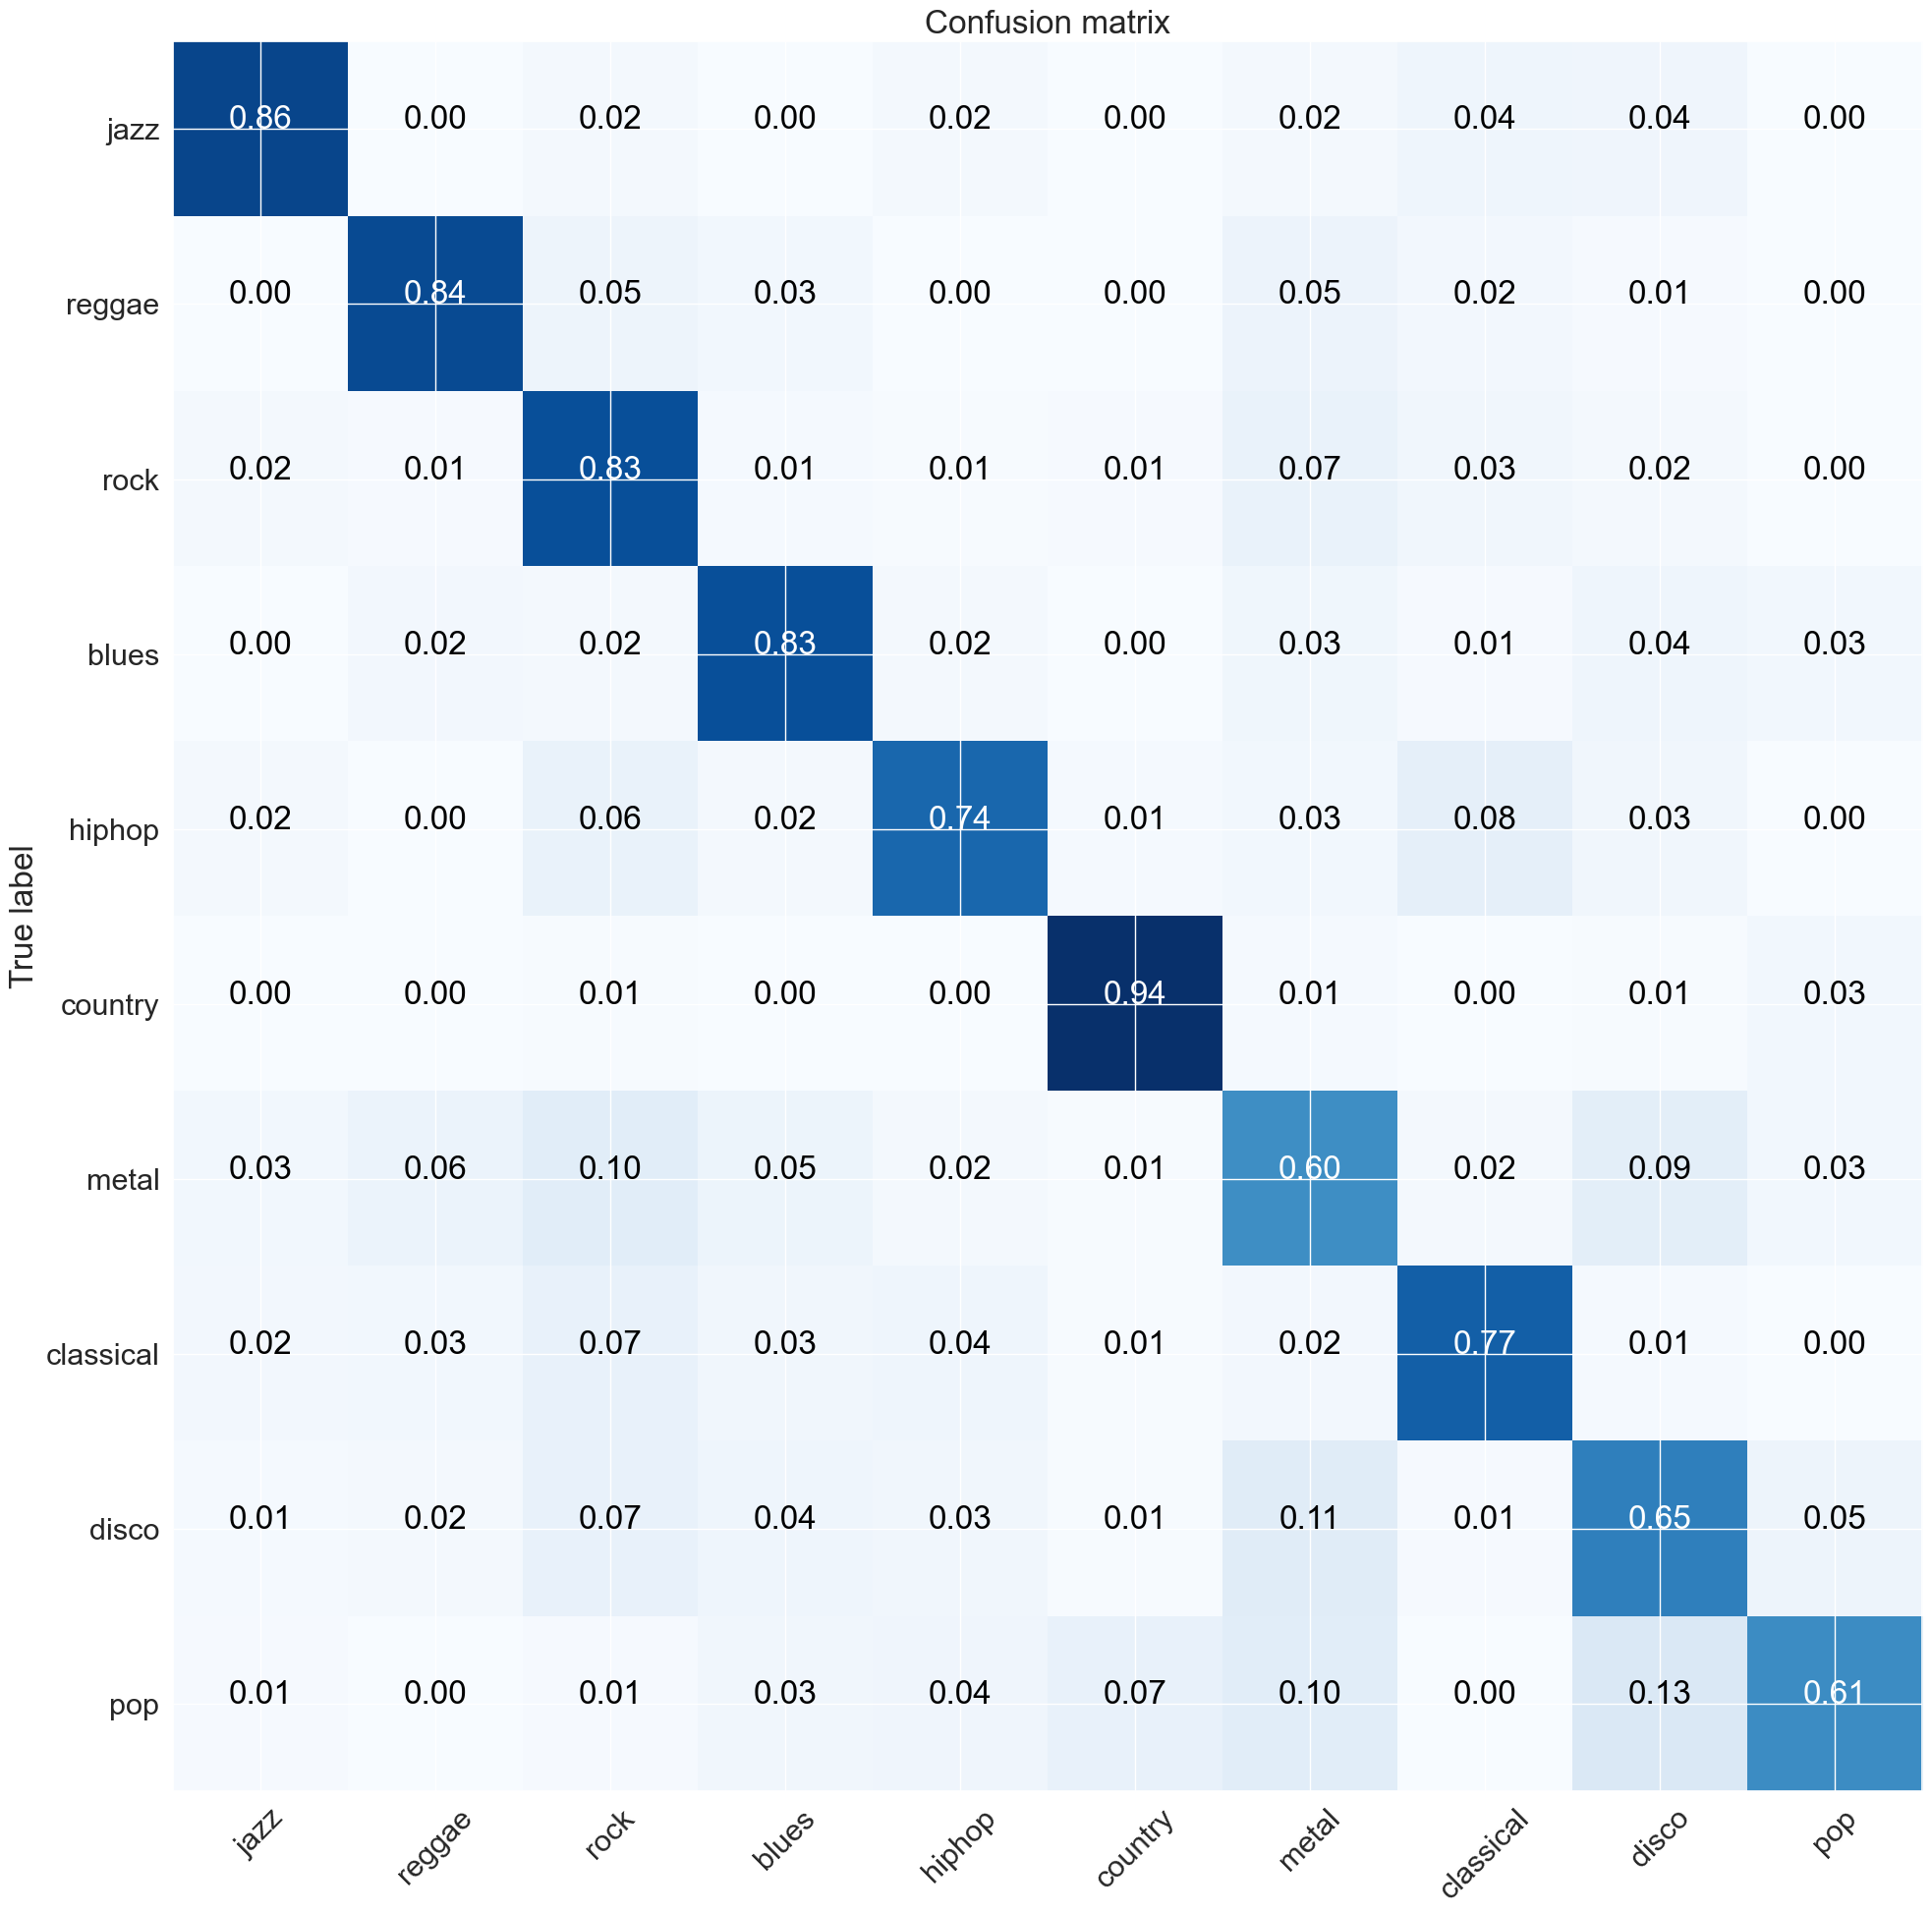

In [15]:
import collections
# imports the collections module into the current namespace, so you could work with this import like this:
import itertools
import collections
orderedDict = collections.OrderedDict()


from collections import OrderedDict

label_dict = {
        'jazz': 0,
        'reggae': 1,
        'rock': 2,
        'blues': 3,
        'hiphop': 4,
        'country': 5,
        'metal': 6,
        'classical': 7,
        'disco': 8,
        'pop': 9
    }
keys = OrderedDict(sorted(label_dict.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(20,20))
plot_confusion_matrix(cm, keys, normalize=True)